# Mobile Money in Tanzania

Start off by importing relevant python modules I will be using in this project.

In [2]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




In [3]:
import sys
!{sys.executable} -m pip install folium --user
import folium

Load in my csv file which contains all the data.

In [4]:
df_mobile= pd.read_csv('training.csv')

Check if the dataframe has been created as expected.

In [5]:
df_mobile.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [6]:
df_income= df_mobile.loc[:, 'Q8_1':'Q8_11'] 

df_mobile['income']= df_income.sum(axis = 1, skipna = True)


Check the names of the columns I have in my dataframe.

In [15]:
have_mobile=df_mobile[df_mobile.mobile_money==1]
dont_have_mobile=df_mobile[df_mobile.mobile_money==0]

In [16]:
have_mobile.shape

(3928, 38)

In [17]:
dont_have_mobile.shape

(3164, 38)

In [19]:
no_mm.shape

(3164, 38)

Rename the columns I have into readable columns which I can work with.

In [8]:
df_mobile = df_mobile.rename({'Q1': 'age', 'Q2': 'gender', 'Q3':'marital_status', 'Q4':'highest_education', 'Q5':'land_ownership', 'Q6':'title_deed', 'Q7':'own_phone', 'Q8_1':'salaries_wages', 'Q8_2':'selling_produce', 'Q8_3':'selling_services', 'Q8_4':'piece_job', 'Q8_5':'rental_income', 'Q8_6':'interest_earned','Q8_7':'pension', 'Q8_8':'social_grant', 'Q8_9':'pocket_money', 'Q8_10':'someone_pays', 'Q8_11':'other', 'Q9':'employer_for_employed', 'Q10':'what_you_sell', 'Q11':'service_you_provide', 'Q12':'sent_money_in_12_months', 'Q13':'when_last_send_money','Q14':'recieved_money_in_12_months','Q15':'when_last_recieve_money','Q16':'how_often_purchase_mobilemoney','Q17':'how_often_pay_bills_with_mm','Q18':'literacy_Kiswhahili','Q19':'literacy_english'}, axis='columns')
df_mobile.columns

Index(['ID', 'age', 'gender', 'marital_status', 'highest_education',
       'land_ownership', 'title_deed', 'own_phone', 'salaries_wages',
       'selling_produce', 'selling_services', 'piece_job', 'rental_income',
       'interest_earned', 'pension', 'social_grant', 'pocket_money',
       'someone_pays', 'other', 'employer_for_employed', 'what_you_sell',
       'service_you_provide', 'sent_money_in_12_months',
       'when_last_send_money', 'recieved_money_in_12_months',
       'when_last_recieve_money', 'how_often_purchase_mobilemoney',
       'how_often_pay_bills_with_mm', 'literacy_Kiswhahili',
       'literacy_english', 'Latitude', 'Longitude', 'mobile_money', 'savings',
       'borrowing', 'insurance', 'mobile_money_classification', 'income'],
      dtype='object')

# 1 Examine the dataset. Are there any missing observations or columns where the data do not seem valid?



## Validate data

In [9]:
def check_range(num, lower, upper):
    if num >= lower and num<= upper:
        return True
    else:
        
        raise ValueError('number is out of range.')
    
def check_int(num):
    try:
        int(num)
    except:
        raise ValueError(f'{num} is not an integer.')
        

In [10]:

#check age
for each in df_mobile.age:
    check_int(each)

#check gender
for each in df_mobile.gender:
    check_int(each)
    check_range(each,1, 2)
    

#check marital status
for each in df_mobile.marital_status:
    check_int(each)
    check_range(each, 1, 4)

#check education level
for each in df_mobile.highest_education:
    try:
        check_int(each)
    except:
        print(f'{each} is not an integer')
    try:
        check_range(each, 1, 7)
    except:
        print('Removing:')
        print(df_mobile[df_mobile.highest_education==each].index)
        df_mobile=df_mobile[df_mobile.highest_education!= each]
        print(f'{each} is not in range. It has been removed')
        
    
#check land ownership
for each in df_mobile.land_ownership:
    check_int(each)
    check_range(each, 1, 6)

#check title deed
for each in df_mobile.title_deed:
    check_int(each)
    check_range(each, 1, 2)

    
#check mobile phone
for each in df_mobile.own_phone:
    check_int(each)
    check_range(each, 1, 2)

#check salaries/wages
for each in df_mobile.salaries_wages:
    check_int(each)
    check_range(each, 0, 1)
    
#check if selling produce
for each in df_mobile.selling_produce:
    check_int(each)
    check_range(each, 0, 1)
    
#check selling services
for each in df_mobile.selling_services:
    check_int(each)
    check_range(each, 0, 1)

#check piece job
for each in df_mobile.piece_job:
    check_int(each)
    check_range(each, 0, 1)
    
#check rental income
for each in df_mobile.rental_income:
    check_int(each)
    check_range(each, 0, 1)
    
#check if earns interest
for each in df_mobile.interest_earned:
    check_int(each)
    check_range(each, 0, 1)

#check if pension
for each in df_mobile.pension:
    check_int(each)
    check_range(each, 0, 1)
    
#social grant
for each in df_mobile.social_grant:
    check_int(each)
    check_range(each, 0, 1)

#pocket money
for each in df_mobile.pocket_money:
    check_int(each)
    check_range(each, 0, 1)
    
#someonepays
for each in df_mobile.someone_pays:
    check_int(each)
    check_range(each, 0, 1)
#other
for each in df_mobile.other:
    check_int(each)
    check_range(each, 0, 1)
    
#employer if employed. -1 means not applicable
for each in df_mobile.employer_for_employed:
    check_int(each)
    if each!=0:
        check_range(each, -1, 7)
    else:
        print('found 0. out of bound')
        
#what you sell
for each in df_mobile.what_you_sell:
    check_int(each)
    check_range(each, -1, 10)
    
#services you sell
for each in df_mobile.service_you_provide:
    if each!= 0:
        check_int(each)
    else:
        print('0 is our of range')
    check_range(each, -1, 12)
    
#sent money last 12 months
for each in df_mobile.sent_money_in_12_months:
    check_int(each)
    check_range(each, 1, 2)

#when last did you send money
for each in df_mobile.when_last_send_money:
    check_int(each)
    check_range(each, -1, 6)
    
#if recieved money is 12 months
for each in df_mobile.recieved_money_in_12_months:
    check_int(each)
    check_range(each, 1, 2)
    
#recieved money is last 12 months
for each in df_mobile.when_last_recieve_money:
    check_int(each)
    check_range(each, -1, 6)

# when last purchase mobile money
for each in df_mobile.how_often_purchase_mobilemoney:
    check_int(each)
    check_range(each, -1, 5)
    
#how often pay in mm'
for each in df_mobile.how_often_pay_bills_with_mm:
    check_int(each)
    check_range(each, -1, 5)
    
#literacy in kiswahili
for each in df_mobile.literacy_Kiswhahili :
    check_int(each)
    check_range(each, 1, 5)

#literacy in English
for each in df_mobile.literacy_english: 
    check_int(each)
    check_range(each, 1, 5)

#latitude
for each in df_mobile.Latitude:
    try:
        float(each)
    except:
        raise TypeError('Latitude must be a float')

#longtitude
for each in df_mobile.Longitude:
    try:
        float(each)
    except:
        raise TypeError('Longitude must be a float')
        
#use mobile money
for each in df_mobile.mobile_money:
    check_int(each)
    check_range(each, 0, 1)
    
#savings
for each in df_mobile.savings:
    check_int(each)
    check_range(each, 0, 1)
    
#check borrowing
for each in df_mobile.borrowing:
    check_int(each)
    check_range(each, 0, 1)

#check insurance
for each in df_mobile.insurance:
    check_int(each)
    check_range(each, 0, 1)
    
#check mobile money classification
for each in df_mobile.mobile_money_classification:
    check_int(each)
    check_range(each, 0, 3)


Removing:
Int64Index([1053, 2486], dtype='int64')
8 is not in range. It has been removed
Removing:
Int64Index([], dtype='int64')
8 is not in range. It has been removed


Check the type of data in my columns as well as the number of entries.

In [10]:
df_mobile[df_mobile.highest_education==8]

,ID,age,gender,marital_status,highest_education,land_ownership,title_deed,own_phone,salaries_wages,selling_produce,...,literacy_Kiswhahili,literacy_english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,income


In [11]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7092 entries, 0 to 7093
Data columns (total 38 columns):
ID                                7092 non-null int64
age                               7092 non-null int64
gender                            7092 non-null int64
marital_status                    7092 non-null int64
highest_education                 7092 non-null int64
land_ownership                    7092 non-null int64
title_deed                        7092 non-null int64
own_phone                         7092 non-null int64
salaries_wages                    7092 non-null int64
selling_produce                   7092 non-null int64
selling_services                  7092 non-null int64
piece_job                         7092 non-null int64
rental_income                     7092 non-null int64
interest_earned                   7092 non-null int64
pension                           7092 non-null int64
social_grant                      7092 non-null int64
pocket_money                 

# 2.Get basic descriptive statistics for the dataset.

See the stats of the data I'll be working with.

In [12]:
df_mobile.describe()

,ID,age,gender,marital_status,highest_education,land_ownership,title_deed,own_phone,salaries_wages,selling_produce,...,literacy_Kiswhahili,literacy_english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,income
count,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,...,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000,7092.000000
mean,4743.376481,38.230541,1.560068,1.787366,3.058658,2.549351,1.840525,1.398054,0.062183,0.630288,...,1.860406,3.163988,-6.035482,35.354899,0.553864,0.461506,0.433023,0.151156,1.799069,1.340948
std,2731.032142,16.325729,0.496414,1.165198,1.555788,1.534253,0.366145,0.489531,0.241504,0.482761,...,1.351485,1.317376,2.720469,2.899436,0.497125,0.498551,0.495529,0.358226,1.197037,0.550584
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2397.750000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,2.000000,-8.279598,32.935719,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,4747.000000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,1.000000,4.000000,-6.088322,35.073388,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,7106.250000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,4.000000,4.000000,-3.517604,38.352004,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000
max,9459.000000,100.000000,2.000000,4.000000,7.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000


Make sure we do not have the same person in multiple entries.

In [13]:
duplicate_ids= df_mobile.ID.duplicated().sum()
print(f'we have {duplicate_ids} duplicate IDs in this dataset.')

we have 0 duplicate IDs in this dataset.


Do away with the ID column since it will not be of use for the rest of the analyses.

In [14]:
#drop the id column
#df_mobile= df_mobile.loc[:, 'Age':]
#df_mobile= df_mobile.drop('ID', axis=1)
#df_mobile.gender= ['male' if each==1 else 'female' for each in df_mobile.gender]
number_to_word= {
    1: 'male',
    2:'female'
}
df_mobile.gender=df_mobile.gender.map(number_to_word)
df_mobile.head()

,ID,age,gender,marital_status,highest_education,land_ownership,title_deed,own_phone,salaries_wages,selling_produce,...,literacy_Kiswhahili,literacy_english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification,income
0,5086,98,female,3,1,1,2,2,0,0,...,4,4,-4.460442,29.811396,0,0,0,0,0,1
1,1258,40,male,1,3,5,1,1,1,0,...,1,4,-6.176438,39.244871,1,1,1,0,3,1
2,331,18,female,4,6,3,2,1,0,0,...,1,1,-6.825702,37.652798,1,0,0,0,2,1
3,6729,50,male,1,3,1,1,1,0,0,...,1,4,-3.372049,35.808307,1,0,1,0,3,1
4,8671,34,male,1,1,1,2,1,0,1,...,1,4,-7.179645,31.039095,1,1,0,1,3,1


# 3.Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income

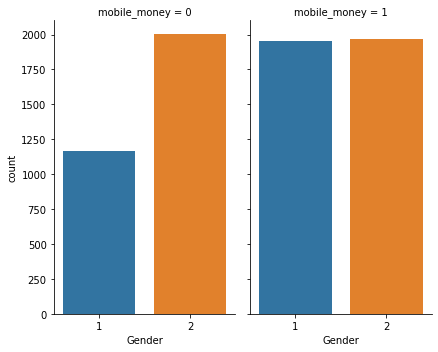

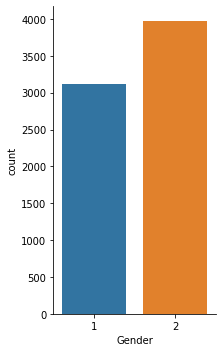

In [30]:
sns.catplot(x='gender',kind='count', col='mobile_money', aspect=.6, data=df_mobile).set(xlabel='Gender')
sns.catplot(x='gender',kind='count', aspect=.6, data=df_mobile).set(xlabel='Gender')

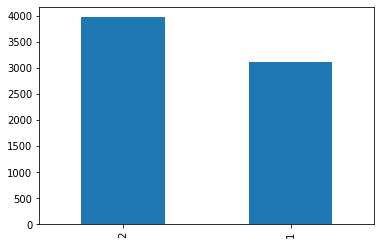

In [31]:
df_mobile.gender.value_counts().plot.bar()

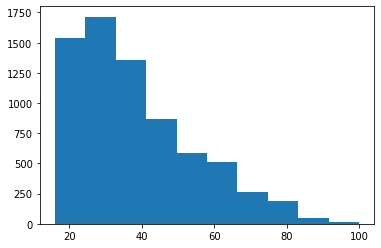

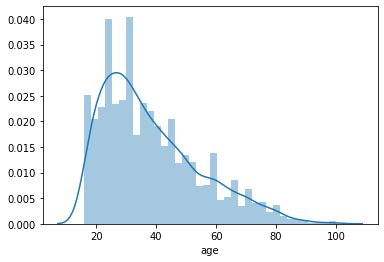

In [32]:
#have_mm= [True for each in df_mobile.mobile_money_classification if each==2 or each==3 ]
#have_mm= [True if each==2 or each==3 else False for each in df_mobile.mobile_money_classification]
#g = sns.catplot(x='Age', col="mobile_money_classification", data=df_mobile, kind='count')
#g.set(xticks=df_mobile.a[2::8])
age= df_mobile.age
#gender= ['male' if each==1 else 'female' for each in df_mobile.gender]
gender= df_mobile.gender
marital_status= df_mobile.marital_status
title_deed= df_mobile.title_deed
plt.hist(age)
plt.show()
sns.distplot(age)


In [33]:
df_age_mobile= df_mobile[['age', 'mobile_money']]

In [34]:
#sns.catplot(x='age',kind='count', col='mobile_money', aspect=.6, data=df_age_mobile).set(xlabel='Gender')


## mobile money classification classification
Separate people into 3 categories:
1. no mobile money
2. Have mobile money only
3. have mobile money and financial some form of financial services.

Different dataframes will be separated for each.

In [35]:
no_mm= df_mobile[(df_mobile.mobile_money_classification==0) | (df_mobile.mobile_money_classification==1)]
have_mm_only= df_mobile[df_mobile.mobile_money_classification==2]
have_mm_fin= df_mobile[df_mobile.mobile_money_classification==3]

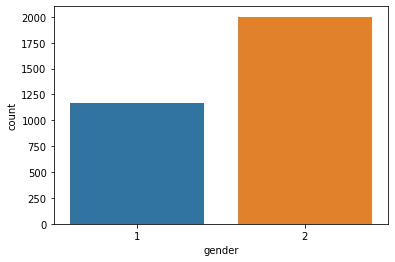

In [36]:

sns.countplot(no_mm.gender)

### mobile money classification vs age

In [37]:

age_no_mm= no_mm.age
age_have_mm_only= have_mm_only.age
age_have_mm_fin= have_mm_fin.age


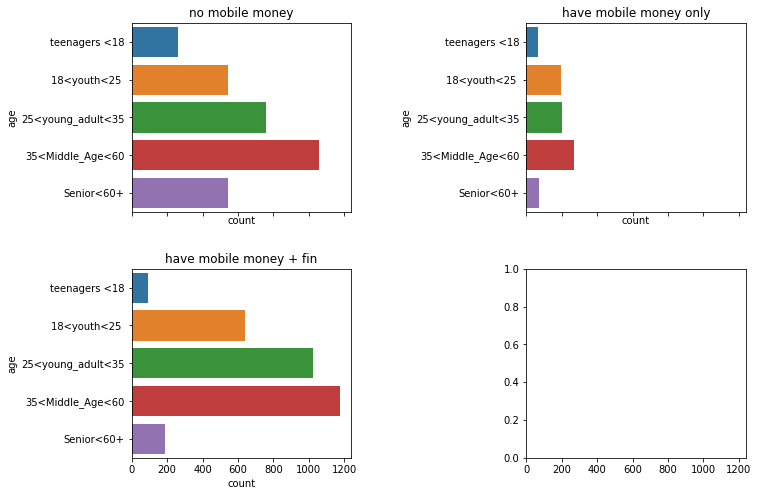

In [38]:
fig, axes= plt.subplots(2, 2, figsize=[11, 8], sharex= True)

bins= [12, 18, 25, 35, 60, 100]
group_names= ['teenagers <18', '18<youth<25 ', '25<young_adult<35', '35<Middle_Age<60', 'Senior<60+']

cats_no= pd.cut(age_no_mm, bins, labels= group_names)
sns.countplot(y=cats_no, ax= axes[0,0]).set_title('no mobile money')

cats_only= pd.cut(age_have_mm_only, bins, labels= group_names)
sns.countplot(y=cats_only, ax= axes[0,1]).set_title('have mobile money only')

cats_fin= pd.cut(age_have_mm_fin, bins, labels= group_names)
sns.countplot(y=cats_fin, ax= axes[1, 0]).set_title('have mobile money + fin')
plt.subplots_adjust(wspace = 0.8 )
plt.subplots_adjust(hspace = 0.3 )
#fig.tight_layout()

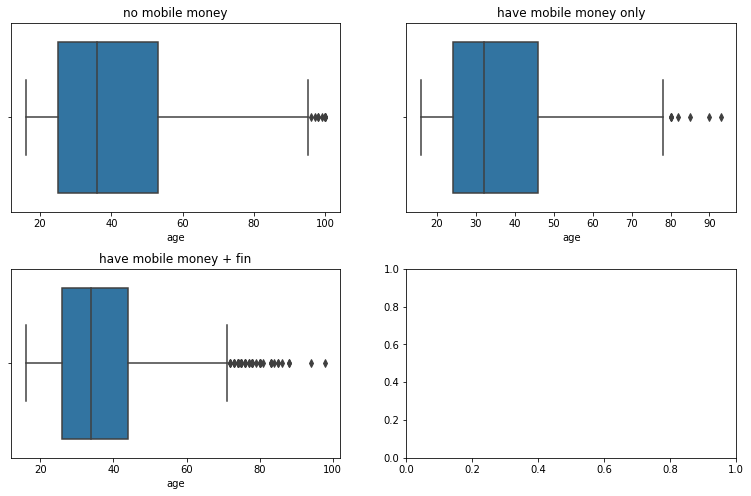

In [39]:
fig, axes= plt.subplots(2, 2, figsize=[13, 8])
sns.boxplot(age_no_mm, ax= axes[0,0]).set_title('no mobile money')
sns.boxplot(age_have_mm_only, ax= axes[0,1]).set_title('have mobile money only')
sns.boxplot(age_have_mm_fin, ax= axes[1,0]).set_title('have mobile money + fin')
plt.subplots_adjust(hspace = 0.3 )

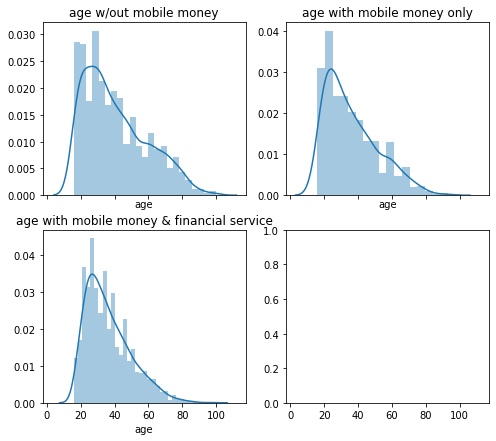

In [40]:
fig, axes= plt.subplots(2, 2, sharex= True ,figsize=(8, 7))
# Distribution of age for people with no mobile money
sns.distplot(age_no_mm, ax= axes[0, 0]).set_title('age w/out mobile money')


# Distribution of age for people with only mobile money
sns.distplot(age_have_mm_only, ax= axes[0, 1]).set_title('age with mobile money only')


# Distribution of age for people with mobile money and financial services
sns.distplot(age_have_mm_fin, ax= axes[1, 0]).set_title('age with mobile money & financial service')
plt.show()

### mobile money classification vs Gender

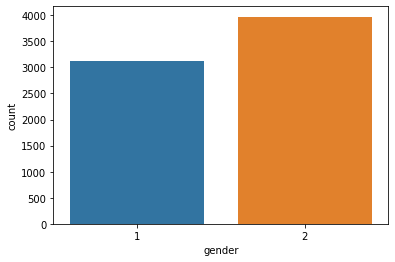

In [41]:
sns.countplot(gender)

In our dataset, we see that we have round about 4000 females as opposed to +/- 3000 males.

Text(0.5, 1.0, 'have money money & fin service')

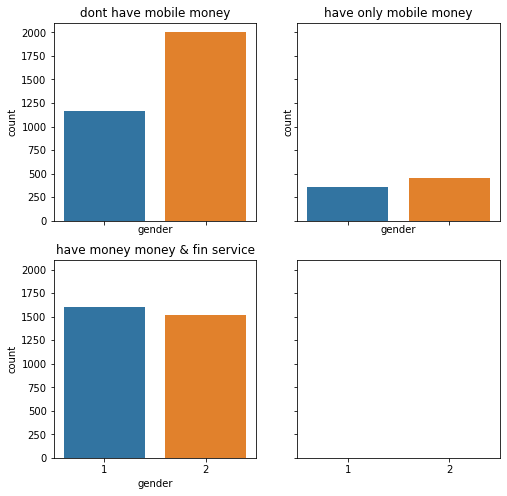

In [42]:
fig, axes= plt.subplots(2, 2, sharey= True, sharex= True, figsize=[8, 8])
sns.countplot(no_mm.gender, ax= axes[0,0]).set_title('dont have mobile money')

sns.countplot(have_mm_only.gender, ax= axes[0, 1]).set_title('have only mobile money')

sns.countplot(have_mm_fin.gender, ax= axes[1,0]).set_title('have money money & fin service')

# Where are the money users located?

In [43]:
df_location= df_mobile[['Latitude', 'Longitude']]
df_location.head()

,Latitude,Longitude
0,-4.460442,29.811396
1,-6.176438,39.244871
2,-6.825702,37.652798
3,-3.372049,35.808307
4,-7.179645,31.039095


### Create the Bounding plot. 
This is the boundries of a plot defined by the Latitude and Longitude.

In [44]:
BBox= (df_location.Longitude.min(), df_location.Longitude.max(),
       df_location.Latitude.min(), df_location.Latitude.max())
BBox

(29.6395777, 40.2587439, -11.46746306, -1.08399964)

Import the image of the map of which I created using the Boundry Box coordinates at www.openstreetmap.org

In [45]:
tanzania_map= plt.imread('map.png')

Create a scatter plot on top of the map image.

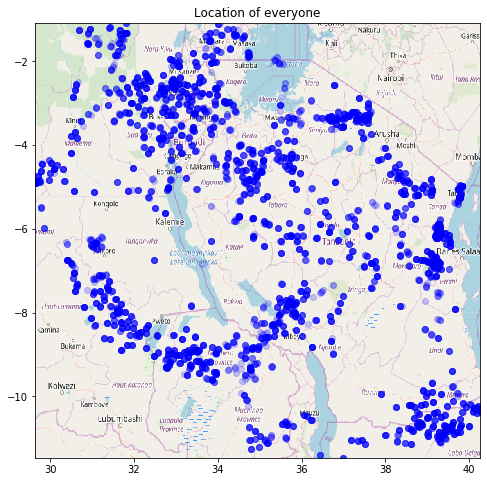

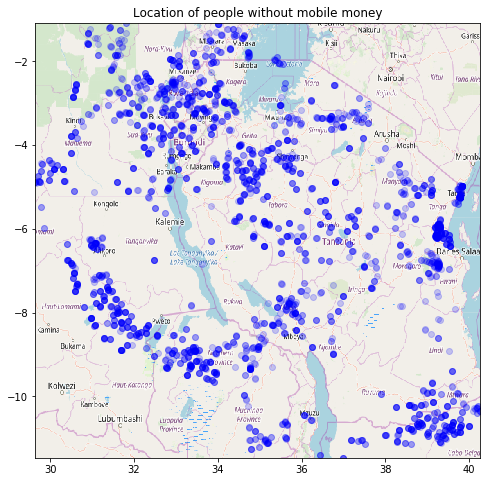

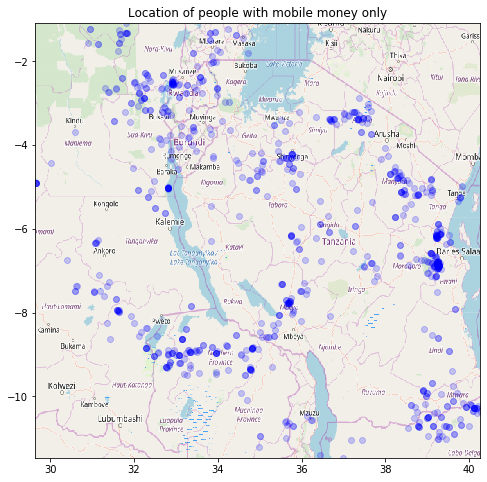

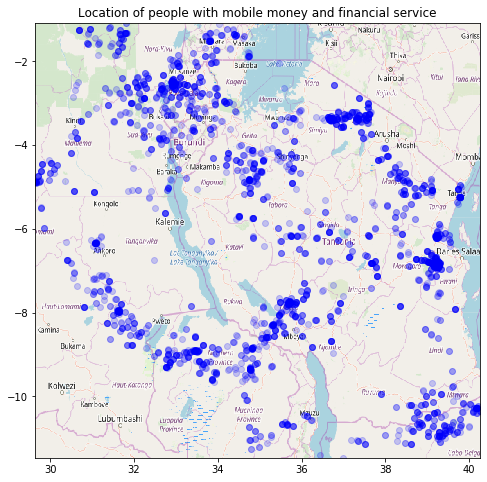

In [46]:
#'Location of Mobile Money users
#fig, axes= plt.subplots(4, 1, sharey= True, sharex= True, figsize=[8, 8])

'''
fig, ax= plt.subplots(figsize=(6,6))
ax.scatter(df_location.Longitude, df_location.Latitude, alpha=0.2, zorder=1, c='b')

ax.set_title('Location of Mobile Money users')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(tanzania_map, zorder=0, extent= BBox, aspect= 'equal')
plt.show()

#Location of people without mobile money
fig, ax= plt.subplots(figsize=(6,6))
ax.scatter(no_mm.Longitude, no_mm.Latitude, alpha=0.2, zorder=1, c='b')

ax.set_title('Location of people without mobile money')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(tanzania_map, zorder=0, extent= BBox, aspect= 'equal')
plt.show()

#Location of people with mobile money only'
fig, ax= plt.subplots(figsize=(6,6))
ax.scatter(have_mm_only.Longitude, have_mm_only.Latitude, alpha=0.2, zorder=1, c='b')

ax.set_title('Location of people with mobile money only')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(tanzania_map, zorder=0, extent= BBox, aspect= 'equal')
plt.show()

#Location of people with mobile money and financial service'
fig, ax= plt.subplots(figsize=(6,6))
ax.scatter(have_mm_fin.Longitude, have_mm_fin.Latitude, alpha=0.2, zorder=1, c='b')

ax.set_title('Location of people with mobile money + financial services')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(tanzania_map, zorder=0, extent= BBox, aspect= 'equal')
plt.show()
'''



titles=['Location of everyone', 
        'Location of people without mobile money' , 
        'Location of people with mobile money only', 
        'Location of people with mobile money and financial service' ]

cats= [df_mobile, no_mm, have_mm_only, have_mm_fin]
count=0
for each in cats:
    fig, ax= plt.subplots(figsize=(8,8))
    ax.scatter(each.Longitude, each.Latitude, alpha=0.2, zorder=1, c='b')
    ax.set_title(titles[count])
    ax.set_xlim(BBox[0], BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    ax.imshow(tanzania_map, zorder=0, extent= BBox, aspect= 'equal')
    plt.show()
    count+=1
    

NameError: name 'df_income_have_mm_only' is not defined

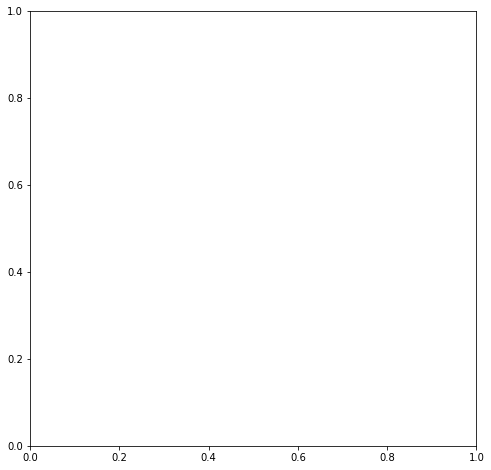

In [47]:
fig, ax= plt.subplots(figsize=(8,8))
ax.scatter(df_income_have_mm_only.Latitude, df_income_have_mm_only.Latitude, alpha=0.2, zorder=1, c='r')
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(tanzania_map, zorder=0, extent= BBox, aspect= 'equal')
plt.show()



TO DO:
Analyse relationship marital status, land ownership and type of income with class.
relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

In [48]:
from folium.plugins import MarkerCluster

## Marital Status

In [49]:

m= folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)
'''
for lat, long in zip(df_mobile.Latitude, df_mobile.Longitude):
    #folium.Marker([lat, long], clustered_marker= True).add_to(m)
    m.simple_marker(location=[lat, long], cluster_marker= True)

m
'''
marker_cluster = MarkerCluster().add_to(m)

'''
for lat, long in zip(have_mobile.Latitude, have_mobile.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
'''
for lat, long in zip(have_mobile.Latitude, have_mobile.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)


m

In [50]:
df_income.duplicated().sum()

7011

In [51]:
df_income.Longitude.duplicated().sum()

AttributeError: 'DataFrame' object has no attribute 'Longitude'

In [52]:
df_income.Longitude.nunique()

AttributeError: 'DataFrame' object has no attribute 'Longitude'

In [53]:
m.save('Tanzania-cycle.html')

## income
created a new column called income tryna check if whether the number of sources of income means more chances of having mobile money.

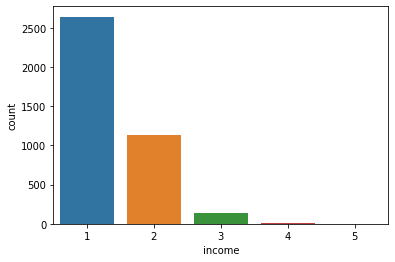

In [54]:
sns.countplot(have_mobile.income)


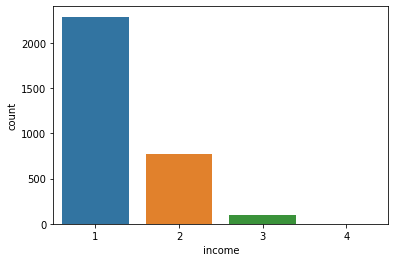

In [55]:
sns.countplot(dont_have_mobile.income)

In [56]:
#df_income= pd.melt(df_mobile, id_vars=['age', 'gender', 'marital_status', 'highest_education', 'land_ownership', 'title_deed', 'own_phone', 'literacy_Kiswhahili', 'literacy_english', 'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing', 'insurance', 'mobile_money_classification'], var_name='cols', value_name='vals')
df_income= df_mobile[['ID','age','gender', 'marital_status', 'title_deed', 'how_often_purchase_mobilemoney','salaries_wages', 'selling_produce', 'selling_services',
       'piece_job', 'rental_income', 'interest_earned', 'pension',
       'social_grant', 'pocket_money', 'someone_pays', 'other', 'mobile_money_classification', 'Latitude', 'Longitude']]
df_income= pd.melt(df_income, id_vars=['ID','age','gender','marital_status', 'title_deed','Latitude', 'Longitude','mobile_money_classification', 'how_often_purchase_mobilemoney'], var_name= 'income_type', value_name='income_value')
df_income.head()

,ID,age,gender,marital_status,title_deed,Latitude,Longitude,mobile_money_classification,how_often_purchase_mobilemoney,income_type,income_value
0,5086,98,2,3,2,-4.460442,29.811396,0,1,salaries_wages,0
1,1258,40,1,1,1,-6.176438,39.244871,3,4,salaries_wages,1
2,331,18,2,4,2,-6.825702,37.652798,2,1,salaries_wages,0
3,6729,50,1,1,1,-3.372049,35.808307,3,4,salaries_wages,0
4,8671,34,1,1,2,-7.179645,31.039095,3,1,salaries_wages,0


In [57]:
#sns.countplot(x='income_type', data=df_income, orient='v')
'''
df_income['mobile_money_classification']= ['no_mm' if each==0 else each for each in df_income.mobile_money_classification ]
df_income['mobile_money_classification']= ['no_mm_but_fin' if each==1 else each for each in df_income.mobile_money_classification ]
df_income['mobile_money_classification']= ['mm_only' if each==2 else each for each in df_income.mobile_money_classification ]
df_income['mobile_money_classification']= ['mm_plus_fin' if each==3 else each for each in df_income.mobile_money_classification ]
'''
number_to_word= {
    0: 'no_mm',
    1:'no_mm_but_fin',
    2: 'mm_only',
    3: 'mm_plus_fin'
}

df_income['mobile_money_classification']= df_income['mobile_money_classification'].map(number_to_word)
sns.catplot(x='mobile_money_classification', y='value', hue='income_type', kind='bar', data=df_income)
plt.figure(figsize=([10, 10]))
plt.show()

ValueError: Could not interpret input 'value'

In [58]:
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(have_mobile.Latitude, have_mobile.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)


m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

folium.Marker(
    location=[45.3288, -121.6625],
    popup='Mt. Hood Meadows',
    icon=folium.Icon(icon='cloud')
).add_to(m)

# 4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.



See gender in respect with frequncy

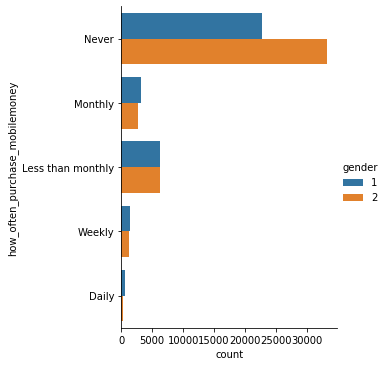

In [59]:
'''
df_income['how_often_purchase_mobilemoney']= ['NA' if each==-1 else each for each in df_income.how_often_purchase_mobilemoney ]
df_income['how_often_purchase_mobilemoney']= ['Never' if each==1 else each for each in df_income.how_often_purchase_mobilemoney ]
df_income['how_often_purchase_mobilemoney']= ['Daily' if each==2 else each for each in df_income.how_often_purchase_mobilemoney  ]
df_income['how_often_purchase_mobilemoney']= ['Weekly' if each==3 else each for each in df_income.how_often_purchase_mobilemoney ]
df_income['how_often_purchase_mobilemoney']= ['Monthly' if each==4 else each for each in df_income.how_often_purchase_mobilemoney  ]
df_income['how_often_purchase_mobilemoney']= ['Less than monthly' if each==5 else each for each in df_income.how_often_purchase_mobilemoney  ]
'''

number_to_word= {
    -1: 'NA',
    1: 'Never',
    2: 'Daily',
    3: 'Weekly',
    4: 'Monthly',
    5: 'Less than monthly'
}
df_income['how_often_purchase_mobilemoney']= df_income['how_often_purchase_mobilemoney'].map(number_to_word)
sns.catplot(hue='gender', y='how_often_purchase_mobilemoney', data=df_income, kind='count')
plt.show()


marital status vs frequency

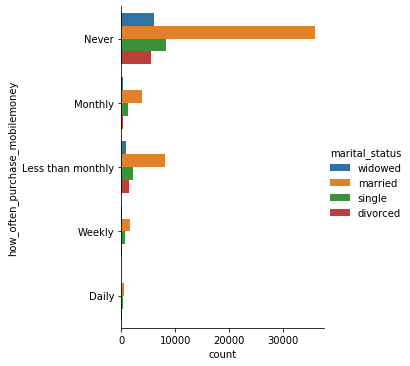

In [60]:
'''
df_income['marital_status']= ['married' if each==1 else each for each in df_income.marital_status ]
df_income['marital_status']= ['divorced' if each==2 else each for each in df_income.marital_status ]
df_income['marital_status']= ['widowed' if each==3 else each for each in df_income.marital_status ]
df_income['marital_status']= ['single' if each==4 else each for each in df_income.marital_status ]
'''
number_to_word={
    1: 'married',
    2: 'divorced',
    3: 'widowed',
    4: 'single'
    
}
df_income['marital_status']= df_income['marital_status'].map(number_to_word)

sns.catplot(hue='marital_status', y='how_often_purchase_mobilemoney', data=df_income, kind='count')

Land Ownership

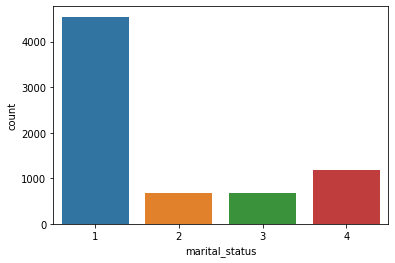

In [61]:
sns.countplot(df_mobile.marital_status)

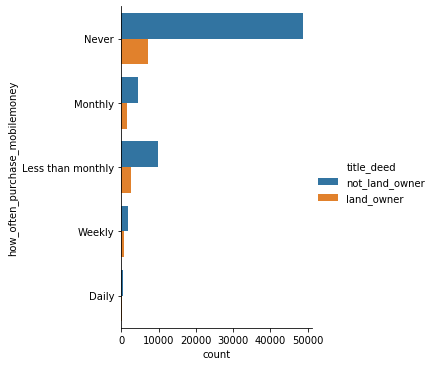

In [62]:
#df_income['title_deed']= ['land_owner' if each==1 else 'not_owner' for each in df_income.title_deed ]
number_to_word= {
    1: 'land_owner',
    2:'not_land_owner'
}
df_income.title_deed= df_income.title_deed.map(number_to_word)
sns.catplot(hue='title_deed', y='how_often_purchase_mobilemoney', data=df_income, kind='count')

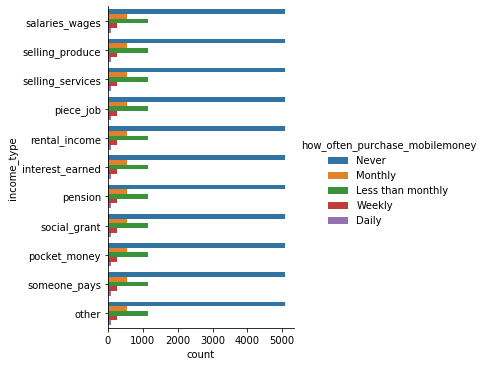

In [63]:
sns.catplot(hue='how_often_purchase_mobilemoney', y='income_type', data=df_income, kind='count')

In [64]:
#df_income.how_often_purchase_mobilemoney.value_counts()
df_mobile.shape


(7092, 38)

In [65]:
df_income.shape

(78012, 11)

In [66]:
df_income.head()

,ID,age,gender,marital_status,title_deed,Latitude,Longitude,mobile_money_classification,how_often_purchase_mobilemoney,income_type,income_value
0,5086,98,2,widowed,not_land_owner,-4.460442,29.811396,no_mm,Never,salaries_wages,0
1,1258,40,1,married,land_owner,-6.176438,39.244871,mm_plus_fin,Monthly,salaries_wages,1
2,331,18,2,single,not_land_owner,-6.825702,37.652798,mm_only,Never,salaries_wages,0
3,6729,50,1,married,land_owner,-3.372049,35.808307,mm_plus_fin,Monthly,salaries_wages,0
4,8671,34,1,married,not_land_owner,-7.179645,31.039095,mm_plus_fin,Never,salaries_wages,0


In [67]:
fig= plt.figure()

<Figure size 432x288 with 0 Axes>

In [48]:
ax1= fig.add_subplot(2, 2, 1)
ax2= fig.add_subplot(2, 2, 2)
ax3= fig.add_subplot(2, 2, 3)



In [49]:
ax2.plot(np.random.randn(50).cumsum(), 'k--')
_= ax1.hist(np.random.randn(100), bins=20)

In [50]:
money_location= df_income.drop_duplicates(subset='ID')
money_location=money_location.head(50)

In [51]:
m= folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)
'''
for lat, long in zip(df_mobile.Latitude, df_mobile.Longitude):
    #folium.Marker([lat, long], clustered_marker= True).add_to(m)
    m.simple_marker(location=[lat, long], cluster_marker= True)

m
'''
marker_cluster = MarkerCluster().add_to(m)

'''
for lat, long in zip(have_mobile.Latitude, have_mobile.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
'''
for lat, long, income_type in zip(money_location.Latitude, money_location.Longitude, money_location.income_type):
    folium.Marker(location = [lat, long],
                  popup=income_type
    ).add_child(folium.Popup(income_type)).add_to(marker_cluster)


m

In [52]:
df_income['color']= df_mobile.apply(lambda x: x)
ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))


ValueError: Wrong number of items passed 38, placement implies 1

In [53]:
word_to_colour= {
    'salaries_wages':'White',
    'selling_produce':'Tan',
    'selling_services':'Yellow',
       'piece_job':'red',
    'rental_income':'pink', 
    'interest_earned': 'Purple', 
    'pension':' Blue',
       'social_grant':'green', 
    'pocket_money': 'brown', 
    'someone_pays':'lime',
    'other':'orange'
}
  


df_income_no_mm= df_income[(df_income.mobile_money_classification=='no_mm') | (df_mobile.mobile_money_classification=='no_mm_but_fin')]
df_income_have_mm_only= df_income[df_income.mobile_money_classification=='mm_only']
df_income_have_mm_fin= df_income[df_income.mobile_money_classification=='mm_plus_fin']


/home/masai/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [54]:
df_income_have_mm_only=df_income_have_mm_only[df_income_have_mm_only!='other']

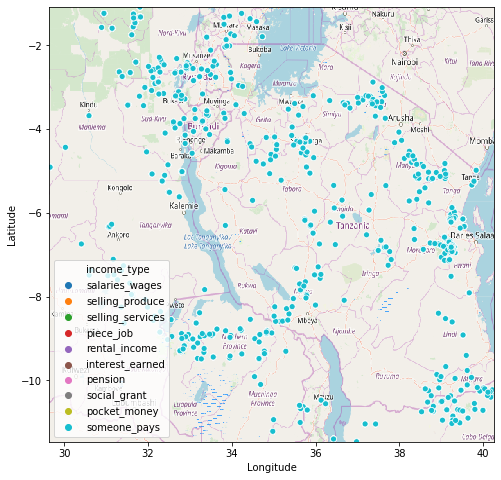

In [55]:
'''
fig, ax= plt.subplots(figsize=(8,8))
#ax.scatter(df_income_have_mm_only.Latitude, df_income_have_mm_only.Latitude, alpha=0.2, zorder=1, c='r')
#plt.scatter(df_income_have_mm_only.Latitude, df_income_have_mm_only.Longitude)
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.scatter(df_income_have_mm_only.Longitude, df_income_have_mm_only.Latitude, alpha=0.2, zorder=1, c='b')
ax.imshow(tanzania_map, zorder=0, extent= BBox, aspect= 'equal')

plt.show()
'''
fig, ax= plt.subplots(figsize=(8,8))
#ax.scatter(df_income_have_mm_only.Latitude, df_income_have_mm_only.Latitude, alpha=0.2, zorder=1, c='r')
#plt.scatter(df_income_have_mm_only.Latitude, df_income_have_mm_only.Longitude)
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
sns.scatterplot(x='Longitude', y='Latitude', hue='income_type', data=df_income_have_mm_only)
ax.imshow(tanzania_map, zorder=0, extent= BBox, aspect= 'equal')

plt.show()



In [56]:
df_income.columns

Index(['ID', 'age', 'gender', 'marital_status', 'title_deed', 'Latitude',
       'Longitude', 'mobile_money_classification',
       'how_often_purchase_mobilemoney', 'income_type', 'income_value'],
      dtype='object')

In [ ]:
df_income.income_type.unique()

In [135]:
colours=[]
for col in df_income.income_type:
    #if col in df_income.income_type:
    colours.append(word_to_colour[col])
    #print(color)

df_income['colour']=colours

In [136]:
df_income.head()

,ID,age,gender,marital_status,title_deed,Latitude,Longitude,mobile_money_classification,how_often_purchase_mobilemoney,income_type,income_value,colour
0,5086,98,female,widowed,not_land_owner,-4.460442,29.811396,no_mm,Never,salaries_wages,0,White
1,1258,40,male,married,land_owner,-6.176438,39.244871,mm_plus_fin,Monthly,salaries_wages,1,White
2,331,18,female,single,not_land_owner,-6.825702,37.652798,mm_only,Never,salaries_wages,0,White
3,6729,50,male,married,land_owner,-3.372049,35.808307,mm_plus_fin,Monthly,salaries_wages,0,White
4,8671,34,male,married,not_land_owner,-7.179645,31.039095,mm_plus_fin,Never,salaries_wages,0,White


In [137]:
df_income.colour.unique()

array(['White', 'Tan', 'Yellow', 'red', 'pink', 'Purple', ' Blue',
       'green', 'brown', 'lime', 'orange'], dtype=object)

In [142]:
df_income_new= df_income[(df_income.income_value==1)&(df_income.mobile_money_classification!='no_mm')]

In [143]:
df_income_new.income_type.value_counts()

selling_produce     3697
piece_job           1976
pocket_money         844
salaries_wages       422
selling_services     377
someone_pays         245
social_grant          94
rental_income         55
interest_earned       32
pension               30
other                  9
Name: income_type, dtype: int64

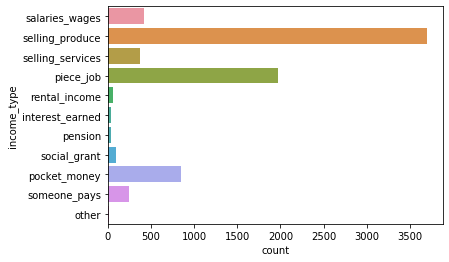

In [144]:
sns.countplot(y=df_income_new.income_type)

In [69]:
df_income_top1= df_income_new[df_income_new.income_type=='selling_produce']
#| (df_income_new.income_type=='piece_job')]
df_income_top1= df_income_top1

NameError: name 'df_income_new' is not defined

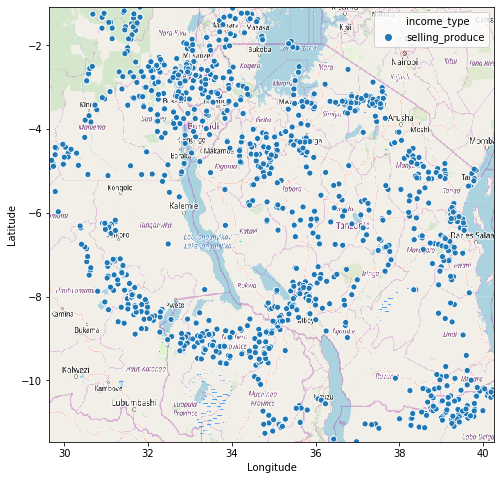

In [146]:
fig, ax= plt.subplots(figsize=(8,8))
#ax.scatter(df_income_have_mm_only.Latitude, df_income_have_mm_only.Latitude, alpha=0.2, zorder=1, c='r')
#plt.scatter(df_income_have_mm_only.Latitude, df_income_have_mm_only.Longitude)
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
sns.scatterplot(x='Longitude', y='Latitude', hue='income_type', data=df_income_top1)
ax.imshow(tanzania_map, zorder=0, extent= BBox, aspect= 'equal')

plt.show()

In [147]:
df_income_top1.income_type.value_counts()

selling_produce    3697
Name: income_type, dtype: int64

In [68]:
m= folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(df_income_top1.Latitude, df_income_top1.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)


m

NameError: name 'df_income_top1' is not defined